/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras IRIS Accuracy: 1.0
Keras IRIS Loss: 0.48885267972946167


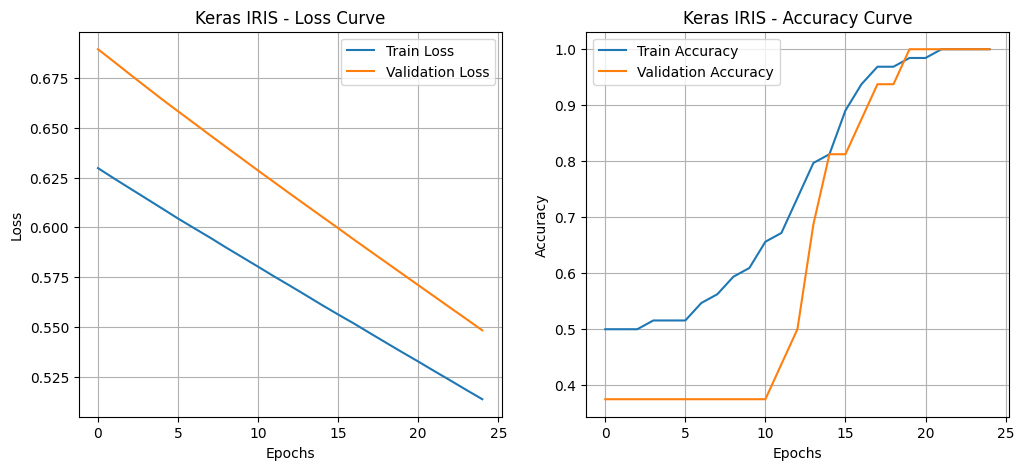

In [2]:
# ----------------------------------------------------------
# KERAS – IRIS Binary Classification (Accuracy + Loss + Graphs)
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use only Setosa (0) and Versicolor (1)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2, verbose=0)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Keras IRIS Accuracy:", accuracy)
print("Keras IRIS Loss:", loss)

# Graphs
plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Keras IRIS - Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.grid(True)

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Keras IRIS - Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.grid(True)

plt.show()
